<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev2/S9/EVA4_S9_Solution_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session9 : CIFAR 10

**Target**: 


*   Move your last code's transformations to Albumentations. Apply ToTensor, HorizontalFlip, Normalize (at min) + More (for additional points)
Please make sure that your test_transforms are simple and only using ToTensor and Normalize
*   Implement GradCam function as a module. 
Your final code (notebook file) must use imported functions to implement transformations and GradCam functionality
*   Target Accuracy is 87%
*   Submit answers to S9-Assignment-Solution. 

**Results**

*  Total Parameters = 11,173,962
*  After 20 Epochs, Final Train Accuracy = 
*  After 20 Epochs, Final Test Accuracy =

**Analysis**

*  Target accuracy > 87% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Module and Models 

In [1]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev2 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 9.2MB/s 



## 2. Loading train and test data with transforms and loader functions

In [2]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True



Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [3]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified


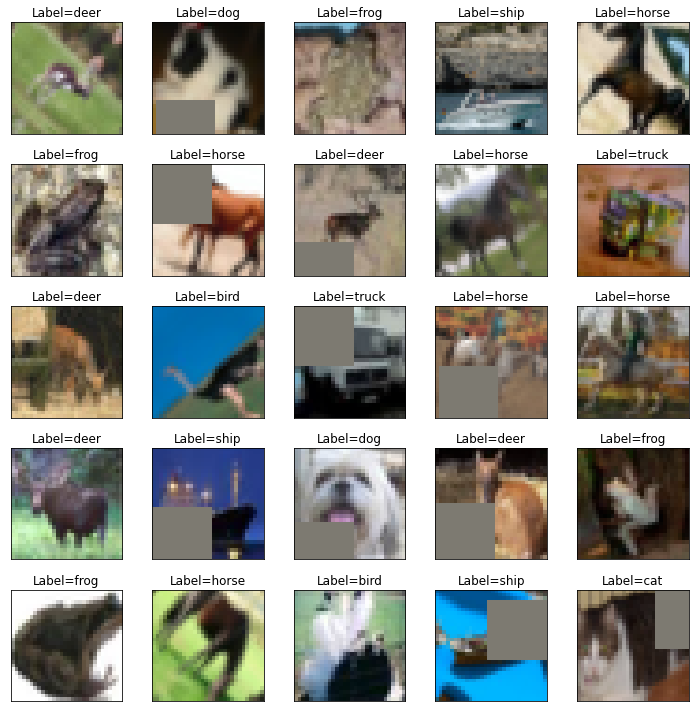

In [4]:
cifar10.sample_pictures(train_flag=True)

# The Model

In [5]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [6]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9)

# Training and Testing

In [8]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(21):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.3954256772994995 Batch_id=390 Accuracy=43.55: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5632/10000 (56.32%)


Epoch: 1


Loss=1.3625235557556152 Batch_id=390 Accuracy=59.71: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 5549/10000 (55.49%)


Epoch: 2


Loss=0.6527309417724609 Batch_id=390 Accuracy=67.43: 100%|██████████| 391/391 [00:56<00:00,  6.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7184/10000 (71.84%)


Epoch: 3


Loss=0.7637641429901123 Batch_id=390 Accuracy=71.40: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7747/10000 (77.47%)


Epoch: 4


Loss=0.6714174151420593 Batch_id=390 Accuracy=74.29: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7890/10000 (78.90%)


Epoch: 5


Loss=0.6917665600776672 Batch_id=390 Accuracy=76.01: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7924/10000 (79.24%)


Epoch: 6


Loss=0.4013575613498688 Batch_id=390 Accuracy=77.87: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8227/10000 (82.27%)


Epoch: 7


Loss=0.6153937578201294 Batch_id=390 Accuracy=79.22: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8104/10000 (81.04%)


Epoch: 8


Loss=0.6129559278488159 Batch_id=390 Accuracy=80.37: 100%|██████████| 391/391 [00:58<00:00,  6.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8527/10000 (85.27%)


Epoch: 9


Loss=0.4493468701839447 Batch_id=390 Accuracy=81.55: 100%|██████████| 391/391 [00:57<00:00,  6.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8232/10000 (82.32%)


Epoch: 10


Loss=0.530454695224762 Batch_id=390 Accuracy=82.42: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8639/10000 (86.39%)


Epoch: 11


Loss=0.6546639800071716 Batch_id=390 Accuracy=83.21: 100%|██████████| 391/391 [00:58<00:00,  6.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8635/10000 (86.35%)


Epoch: 12


Loss=0.40080469846725464 Batch_id=390 Accuracy=83.98: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8714/10000 (87.14%)


Epoch: 13


Loss=0.46710628271102905 Batch_id=390 Accuracy=84.75: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8594/10000 (85.94%)


Epoch: 14


Loss=0.456030935049057 Batch_id=390 Accuracy=85.50: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8753/10000 (87.53%)


Epoch: 15


Loss=0.41266298294067383 Batch_id=390 Accuracy=86.08: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8730/10000 (87.30%)


Epoch: 16


Loss=0.37149444222450256 Batch_id=390 Accuracy=86.26: 100%|██████████| 391/391 [00:57<00:00,  7.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8840/10000 (88.40%)


Epoch: 17


Loss=0.5668500661849976 Batch_id=390 Accuracy=86.84: 100%|██████████| 391/391 [00:58<00:00,  6.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8806/10000 (88.06%)


Epoch: 18


Loss=0.5450758934020996 Batch_id=390 Accuracy=87.31: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8614/10000 (86.14%)


Epoch: 19


Loss=0.3032117486000061 Batch_id=390 Accuracy=87.76: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8955/10000 (89.55%)


Epoch: 20


Loss=0.4651698172092438 Batch_id=390 Accuracy=88.16: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]



Test set: Average loss: 0.0031, Accuracy: 8718/10000 (87.18%)

Finished Training


# display an image from the test set

Files already downloaded and verified


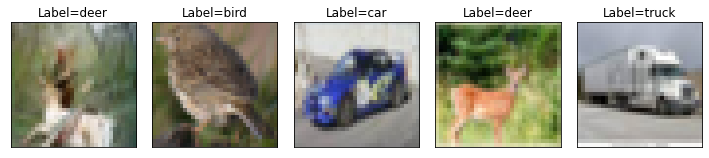

In [9]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

# Prediction of sampe test set

In [10]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:    dog  bird   car  deer truck


# Plotting Train & Test Accuracy/Losses

Text(0.5, 1.0, 'Test Accuracy')

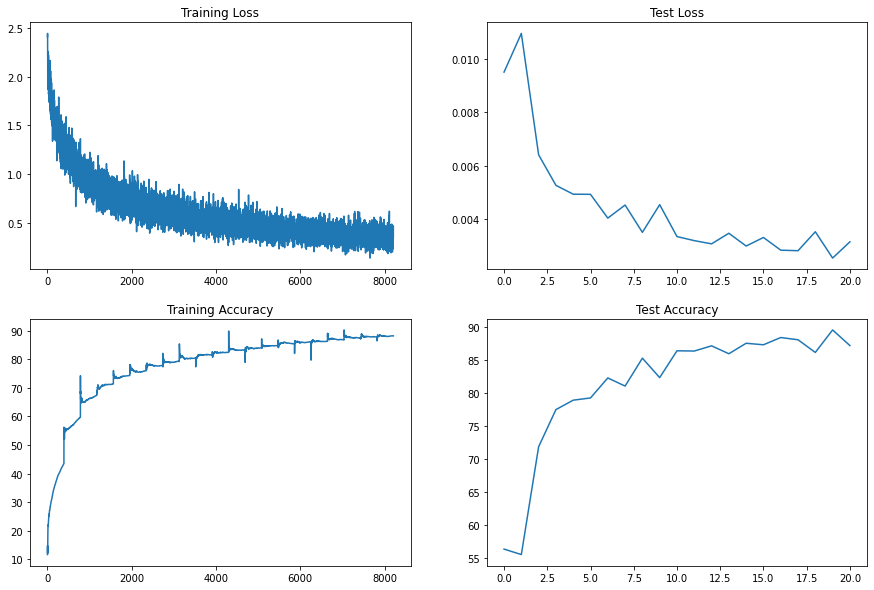

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test.test_acc)
axs[1, 1].set_title("Test Accuracy")

# Evaluating test Accuracy over different classes 

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 93 %
Accuracy of   car : 87 %
Accuracy of  bird : 85 %
Accuracy of   cat : 79 %
Accuracy of  deer : 86 %
Accuracy of   dog : 86 %
Accuracy of  frog : 71 %
Accuracy of horse : 97 %
Accuracy of  ship : 93 %
Accuracy of truck : 96 %


Files already downloaded and verified


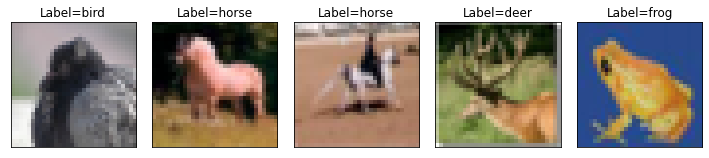

In [13]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

In [0]:
# initialize a model, model_dict and gradcam
resnet = net
resnet.eval()
gradcam = GradCAM.from_config(model_type='resnet', arch=resnet, layer_name='layer4')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


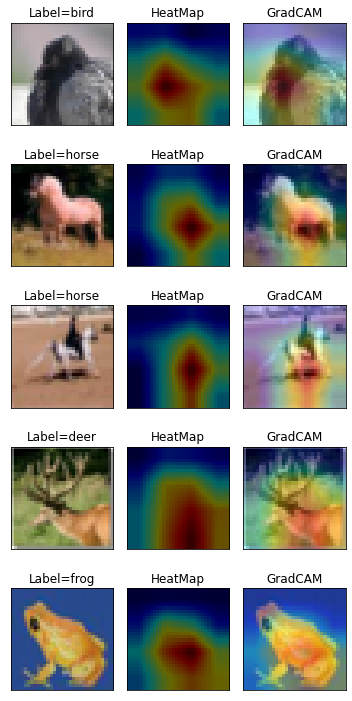

In [15]:
fig = plt.figure(figsize=(5, 10))
idx_cnt=1
for idx in np.arange(len(labels.numpy())):

  img = images[idx]
  lbl = labels.numpy()[idx]

  # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
  img = img.unsqueeze(0).to(device)
  org_img = denormalize(img,mean=(0.4914, 0.4822, 0.4465),std=(0.2023, 0.1994, 0.2010))

  # get a GradCAM saliency map on the class index 10.
  mask, logit = gradcam(img, class_idx=lbl)
  # make heatmap from mask and synthesize saliency map using heatmap and img
  heatmap, cam_result = visualize_cam(mask, org_img, alpha=0.4)

  # Show images
  # for idx in np.arange(len(labels.numpy())):
  # Original picture
  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(org_img[0].cpu().numpy(),(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("Label={}".format(str(classes[lbl])))
  idx_cnt+=1

  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(heatmap,(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("HeatMap".format(str(classes[lbl])))
  idx_cnt+=1

  ax = fig.add_subplot(5, 3, idx_cnt, xticks=[], yticks=[])
  npimg = np.transpose(cam_result,(1,2,0))
  ax.imshow(npimg, cmap='gray')
  ax.set_title("GradCAM".format(str(classes[lbl])))
  idx_cnt+=1

fig.tight_layout()  
plt.show()